In [2]:
import cv2;
import numpy as np;


In [3]:
im = cv2.imread("002.jpeg", cv2.IMREAD_GRAYSCALE)
detector = cv2.SimpleBlobDetector_create()
# Detect blobs.
keypoints = detector.detect(im)
# Draw detected blobs as red circles.

# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Show keypoints

th, dst = cv2.threshold(im,90,255, cv2.THRESH_BINARY);


cv2.imwrite("opencv-thresh-binary-maxval.jpg", dst);

# cv2.imshow("Keypoints", im_with_keypoints)
# cv2.waitKey(0)


error: OpenCV(4.5.3) /Users/runner/miniforge3/conda-bld/libopencv_1630689852376/work/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [4]:
im = cv2.imread("opencv-thresh-binary-maxval.jpg", cv2.IMREAD_GRAYSCALE)
detector = cv2.SimpleBlobDetector_create()
# Detect blobs.
keypoints = detector.detect(im)
# Draw detected blobs as red circles.

# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob

im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# Show keypoints


cv2.imshow("Keypoints", im_with_keypoints)
cv2.waitKey(0)

error: OpenCV(4.5.3) /Users/runner/miniforge3/conda-bld/libopencv_1630689852376/work/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [7]:
import numpy as np
import cv2
import glob

In [8]:
    im = cv2.imread("opencv-thresh-binary-maxval.jpg", cv2.IMREAD_GRAYSCALE)
    # Blur image to remove noise
    frame=cv2.GaussianBlur(im, (3, 3), 0)
 
    # Switch image from BGR colorspace to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    # define range of purple color in HSV
    purpleMin = (115,50,10)
    purpleMax = (160, 255, 255)
    
    # Sets pixels to white if in purple range, else will be set to black
    mask = cv2.inRange(hsv, purpleMin, purpleMax)
        
    # Bitwise-AND of mask and purple only image - only used for display
    res = cv2.bitwise_and(frame, frame, mask= mask)
#    mask = cv2.erode(mask, None, iterations=1)
    # commented out erode call, detection more accurate without it
 
    # dilate makes the in range areas larger
    mask = cv2.dilate(mask, None, iterations=1)

error: OpenCV(4.5.3) /Users/runner/miniforge3/conda-bld/libopencv_1630689852376/work/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'


In [9]:
import cv2
import numpy as np
num = "225"
kernel = np.ones((11,11),np.uint8)
CONNECTIVITY = 4
DRAW_CIRCLE_RADIUS = 18
img = cv2.imread(path+num+'.jpeg')
blur = cv2.GaussianBlur(img,(49,49),0)
gray_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)


ret, thresh = cv2.threshold(gray_img, 100, 255, cv2.THRESH_BINARY)
erosion = cv2.erode(thresh,kernel,iterations = 1)

components = cv2.connectedComponentsWithStats(erosion, CONNECTIVITY, cv2.CV_32S)

centers = components[3]
centers[0]=centers[1]
for center in centers:
    cv2.circle(img, (int(center[0]), int(center[1])), DRAW_CIRCLE_RADIUS, (0,0,255), thickness=1)
    


# cv2.imshow('Original', img)
# cv2.imshow('Blur', blur)
# cv2.imshow('Thresh', thresh)
# cv2.imshow('Erosion', erosion)
# cv2.waitKey(0)
cv2.imwrite(num +"-thresh.jpg", thresh);

cv2.countNonZero(thresh)

error: OpenCV(4.5.3) /Users/runner/miniforge3/conda-bld/libopencv_1630689852376/work/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'


In [10]:
#!conda install -c conda-forge opencv -y
!pip install matplotlib

     |████████████████████████████████| 7.2 MB 3.6 MB/s            
     |████████████████████████████████| 930 kB 3.7 MB/s            
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.4.2-cp39-cp39-macosx_11_0_arm64.whl (63 kB)


In [15]:
import cv2
import numpy as np
import os
import re
size = [[],[]]
lastVal = 0
diffs = [0,0,0,0,0,0]
vals = [0]
lastDiff = 0.1
#path="./Fluidics-Paper-Experiment/Figure-Selections/processed/"
path = "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/cropped-dataset/"
#path = "./Fluidics-Paper-Experiment/2020-02-07-fluidics-imaging-2-timelapse-2022-04-12T11:54/C15/Cropped-and-adjusted/"
for entry in sorted(os.scandir(path),key=lambda e: e.name):
    #print(entry)
    if (entry.path.endswith(".jpeg") or entry.path.endswith(".png")) and entry.is_file():
        num = re.split('\.|/',entry.path)
        num = num[len(num)-2]
        print(num)
        img = cv2.imread(entry.path)
        blur = cv2.GaussianBlur(img,(49,49),0)
        gray_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray_img, 110, 255, cv2.THRESH_BINARY)
        cv2.imwrite(path+"thresh/"+num +"-thresh.jpg", thresh);
        #print(img.shape)
        #print(cv2.countNonZero(thresh))
        #size[0].append(int(re.split('-|/',entry.path)[1]))
        
        val = (img.shape[0]*img.shape[1]-cv2.countNonZero(thresh))#*0.0000033397
#         diff = abs(abs(val)-abs(lastVal))
#         diffs.append(diff)
#         meanDiff = np.mean(diffs[len(diffs)-5:len(diffs)])
#         meanVals = np.mean(vals[len(vals)-5:len(vals)])
#         print(abs(meanVals))

#         if abs(val-1.1*meanVals) < 0.2:#and val-lastVal > -0.1:
#             size[0].append(int(num))
#             size[1].append((val))
#             vals.append(val)
#             lastVal = val
#             lastDiff = diff


        size[0].append(int(num)/24)
        size[1].append((val))

#         print(re.split('-|/',entry.path)[1])
#         print(img.shape[0]*img.shape[1]-cv2.countNonZero(thresh))
        
        
        

01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
25
30


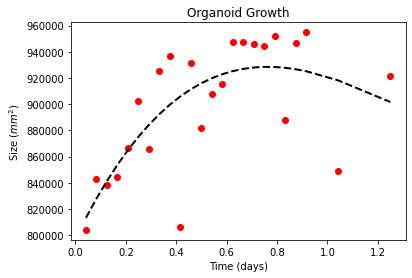

y=89713.547457x+(-361959.935774)


In [24]:
import matplotlib.pylab as plt
plt.plot(size[0],size[1], 'ro')
x= size[0];
y=size[1];
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,p(x),'k--',linewidth=2)
color = 0.8;
plt.ylabel('Size ($mm^2$)')
plt.xlabel('Time (days)')
plt.title("Organoid Growth")
plt.show()
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))

In [19]:
z[0]

1.6286141616411733e-08

In [80]:
entry.path.split("\.")

['./236.jpeg']

In [89]:
re.split('\.|/',entry.path)[2]

'236'

In [102]:
diffs[len(diffs)-5:len(diffs)]

[]

In [101]:
diffs=[]

In [127]:
vals[len(vals)-5:len(vals)]

[0.2375929374, 0.3455954957, 0.1200722341, 0.4936944922, 0.2526917211]

In [18]:
print(size)

[[0.4583333333333333, 1.2916666666666667, 2.125, 2.875, 3.75, 4.583333333333333, 5.458333333333333, 6.291666666666667], [0.0884252369, 0.1172301494, 0.1852731972, 0.2684150287, 0.360654203, 0.4573084607, 0.5538458289, 0.722076537]]


In [57]:
#this is the one to optimize for lights

import cv2
import numpy as np
import os
import re
size = [[],[]]
lastVal = 0
diffs = [0,0,0,0,0,0]
vals = [0]
lastDiff = 0.1
#path="./Fluidics-Paper-Experiment/Figure-Selections/processed/"
path = "/Users/pierre/Pictures/biology/Blob-Measuring/Level-Measurement-Experiment/second-dataset/cropped-dataset/"
#path = "./Fluidics-Paper-Experiment/2020-02-07-fluidics-imaging-2-timelapse-2022-04-12T11:54/C15/Cropped-and-adjusted/"
for entry in sorted(os.scandir(path),key=lambda e: e.name):
    #print(entry)
    if (entry.path.endswith(".jpeg") or entry.path.endswith(".png")) and entry.is_file():
        num = re.split('\.|/',entry.path)
        num = num[len(num)-2]
        print(num)
        img = cv2.imread(entry.path)
        #blur = cv2.GaussianBlur(img,(49,49),0)
        blur = cv2.blur(img,(49,49))
        gray_img = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray_img, 50, 255, cv2.THRESH_BINARY_INV)
        cv2.imwrite(path+"thresh/"+num +"-thresh.jpg", thresh);
        #print(img.shape)
        #print(cv2.countNonZero(thresh))
        #size[0].append(int(re.split('-|/',entry.path)[1]))
        
        val = (img.shape[0]*img.shape[1]-cv2.countNonZero(thresh))#*0.0000033397
#         diff = abs(abs(val)-abs(lastVal))
#         diffs.append(diff)
#         meanDiff = np.mean(diffs[len(diffs)-5:len(diffs)])
#         meanVals = np.mean(vals[len(vals)-5:len(vals)])
#         print(abs(meanVals))

#         if abs(val-1.1*meanVals) < 0.2:#and val-lastVal > -0.1:
#             size[0].append(int(num))
#             size[1].append((val))
#             vals.append(val)
#             lastVal = val
#             lastDiff = diff


        size[0].append(int(num)/10)
        size[1].append((val))

#         print(re.split('-|/',entry.path)[1])
#         print(img.shape[0]*img.shape[1]-cv2.countNonZero(thresh))
        
        
        

06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33


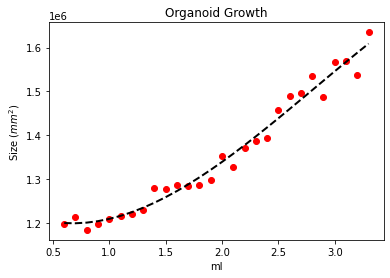

y=-15564.673632x+(131791.010742)


In [58]:
import matplotlib.pylab as plt
plt.plot(size[0],size[1], 'ro')
x= size[0];
y=size[1];
z = np.polyfit(x, y, 3)
p = np.poly1d(z)
plt.plot(x,p(x),'k--',linewidth=2)
color = 0.8;
plt.ylabel('Size ($mm^2$)')
plt.xlabel('ml')
plt.title("Light Diffusion")
plt.show()
print( "y=%.6fx+(%.6f)"%(z[0],z[1]))

In [ ]:
|